# Poisson Process

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def birthdeathmigration(b, d, c, paths):
    X0 = 20  # initial population size
    N = 200  # maximal population size

    s = np.zeros((paths, N))
    X = np.zeros((paths, N))
    X[:, 0] = X0
    s[:, 0] = 0.00

    for j in range(paths):
        i = 0
        while X[j, i] >= 0 and i < (N - 1):
            U1 = np.random.rand()
            U2 = np.random.rand()
            h = - np.log(U1) / ((b + d) * X[j, i] + c)
            s[j, i + 1] = s[j, i] + h

            if U2 < b * X[j, i] / ((b + d) * X[j, i] + c):
                X[j, i + 1] = X[j, i] + 1  # a birth occurs
            elif U2 >= b * X[j, i] / ((b + d) * X[j, i] + c) \
                    and U2 < (b + d) * X[j, i] / ((b + d) * X[j, i] + c):
                X[j, i + 1] = X[j, i] - 1  # a death occurs
            elif U2 >= (b + d) * X[j, i] / ((b + d) * X[j, i] + c):
                X[j, i + 1] = X[j, i] + 1  # immigration occurs

            i += 1

    return [X, s]

In [2]:
def plot(b, d, c, paths):
    fig, ax = plt.subplots()

    [population, sojourn] = birthdeathmigration(b, d, c, paths)

    xmax = max([max(sojourn[k, :]) for k in range(paths)])

    for r in range(paths):
        plt.step(sojourn[r, :], population[r, :],
                 where='pre', label="Path %s" % str(r + 1))

    plt.axis([-0.2, xmax + 0.2, -2, 32])  # ymax+2])
    ax.set_xlabel('Time', fontsize=14)
    ax.set_ylabel('Population Size', fontsize=14)
    plt.text(0.5, 0.9, '$\\beta = %s$' % c, fontsize=14,
             horizontalalignment='center',
             verticalalignment='center',
             transform=ax.transAxes)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.legend(loc=1)
    plt.grid(True)
    plt.show()

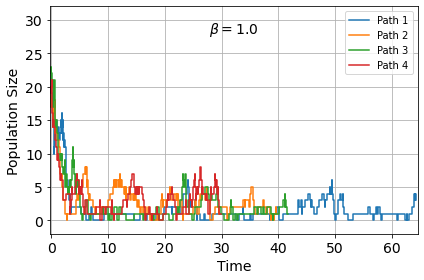

In [5]:
b = 0.5  # birth rate
d = 1.0  # death rate
c = 1.0  # immigration rate
num = 4
plot(b, d, c, num)